In [1]:
import sys
import scanpy as sc
import matplotlib.pyplot as plt
import spatialdata_io, spatialdata, spatialdata_plot
import scanpy as sc
import pandas as pd
import numpy as np

sys.path.insert(0,'/home/cane/Documents/yoseflab/can/resolVI')
from scvi.external import RESOLVI
import scvi

/home/cane/miniconda3/envs/resolvi_spatialdata/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Disable gridlines for all plots
plt.rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.rc = {'figure.dpi': 100, 'figure.figsize': (20, 16)}

In [4]:
scvi.settings.seed = 0
sc.set_figure_params(dpi=100, dpi_save=300, format='png', frameon=False, vector_friendly=True, fontsize=14, color_map='viridis', figsize=None)
sc.settings.figdir = 'figure2'

Seed set to 0


In [6]:
adata = sc.read_h5ad('xenium_brain/original_high_lr/complete_adata.h5ad')
bdata = sc.read_h5ad('xenium_brain/proseg_nucleus/complete_adata.h5ad')

In [7]:
xenium_brain = spatialdata_io.xenium(
    '/data/extra_files/xenium/Xenium_V1_FF_Mouse_Brain_Coronal_outs',
    nucleus_boundaries=False, morphology_mip=True, morphology_focus=True, transcripts=True)

INFO     reading /data/extra_files/xenium/Xenium_V1_FF_Mouse_Brain_Coronal_outs/cell_feature_matrix.h5             


/tmp/ipykernel_1944759/3659244243.py:1: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  xenium_brain = spatialdata_io.xenium(


In [8]:
xenium_brain_proseg = spatialdata_io.xenium(
    '/data/extra_files/xenium/Xenium_V1_FF_Mouse_Brain_Coronal_outs/Xenium_V1_FF_Mouse_Brain_Coronal_proseg/outs',
    nucleus_boundaries=False, morphology_mip=True, morphology_focus=True, transcripts=True)

INFO     reading                                                                                                   
         /data/extra_files/xenium/Xenium_V1_FF_Mouse_Brain_Coronal_outs/Xenium_V1_FF_Mouse_Brain_Coronal_proseg/out
         s/cell_feature_matrix.h5                                                                                  


/tmp/ipykernel_1944759/552179686.py:1: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  xenium_brain_proseg = spatialdata_io.xenium(


In [13]:
spatialdata.transformations.set_transformation(xenium_brain_proseg.points["transcripts"], spatialdata.transformations.Identity(), to_coordinate_system="global")
xenium_brain_proseg.points["transcripts"]['x'] = xenium_brain_proseg.points["transcripts"]['x'] / 0.2125
xenium_brain_proseg.points["transcripts"]['y'] = xenium_brain_proseg.points["transcripts"]['y'] / 0.2125
xenium_brain_proseg.points['expression'] = xenium_brain_proseg.points['transcripts'].loc[xenium_brain_proseg.points['transcripts']['feature_name'].isin(xenium_brain_proseg.table.var_names)]
xenium_brain_proseg.points['expression']['feature_name'] = xenium_brain_proseg.points['expression']['feature_name'].cat.remove_unused_categories().cat.reorder_categories(xenium_brain.table.var_names)
xenium_brain_proseg.points['expression']['feature_id'] = xenium_brain_proseg.points['expression']['feature_name'].cat.codes
xenium_brain_proseg.points['expression'].head()

/tmp/ipykernel_1944759/489660037.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  xenium_brain_proseg.points['expression'] = xenium_brain_proseg.points['transcripts'].loc[xenium_brain_proseg.points['transcripts']['feature_name'].isin(xenium_brain_proseg.table.var_names)]
/tmp/ipykernel_1944759/489660037.py:5: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  xenium_brain_proseg.points['expression']['feature_name'] = xenium_brain_proseg.points['expression']['feature_name'].cat.remove_unused_categories().cat.reorder_categories(xenium_brain.table.var_names)


x            y          z feature_name     cell_id  \
0  141.683304  8543.725586  17.569080      Gm19410  UNASSIGNED   
1  885.648499  9347.125000  16.985256        Rims3  UNASSIGNED   
2  415.580292  9049.498047  17.259207         Gad1  UNASSIGNED   
3  340.500122  8441.903320  17.008242     Tmem255a  UNASSIGNED   
4  857.711731  8869.648438  17.014000         Npnt  UNASSIGNED   

     transcript_id  nucleus_distance  codeword_index         qv fov_name  \
0  281621005600769        356.926056             109  40.000000       T2   
1  281621005600780        124.249146             156  24.959435       T2   
2  281621005601519        240.219864             186  40.000000       T2   
3  281621005602195        347.228821              99  40.000000       T2   
4  281621005602446        212.970108              81  40.000000       T2   

   overlaps_nucleus  feature_id  
0                 0          92  
1                 0         183  
2                 0          82  
3                 0         234  
4                 0         137

In [14]:
spatialdata.transformations.set_transformation(xenium_brain.points["transcripts"], spatialdata.transformations.Identity(), to_coordinate_system="global")
xenium_brain.points["transcripts"]['x'] = xenium_brain.points["transcripts"]['x'] / 0.2125
xenium_brain.points["transcripts"]['y'] = xenium_brain.points["transcripts"]['y'] / 0.2125
xenium_brain.points['expression'] = xenium_brain.points['transcripts'].loc[xenium_brain.points['transcripts']['feature_name'].isin(xenium_brain.table.var_names)]
xenium_brain.points['expression']['feature_name'] = xenium_brain.points['expression']['feature_name'].cat.remove_unused_categories().cat.reorder_categories(xenium_brain.table.var_names)
xenium_brain.points['expression']['feature_id'] = xenium_brain.points['expression']['feature_name'].cat.codes
xenium_brain.points['expression'].head()

/tmp/ipykernel_1944759/2610788975.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  xenium_brain.points['expression'] = xenium_brain.points['transcripts'].loc[xenium_brain.points['transcripts']['feature_name'].isin(xenium_brain.table.var_names)]
/tmp/ipykernel_1944759/2610788975.py:5: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  xenium_brain.points['expression']['feature_name'] = xenium_brain.points['expression']['feature_name'].cat.remove_unused_categories().cat.reorder_categories(xenium_brain.table.var_names)


x            y          z feature_name  cell_id  \
0  25503.501953  4018.564453  18.365158      Bhlhe40     6893   
1  25504.662109  3984.552734  17.318077         Wfs1     6893   
2  25524.388672  3990.523193  19.328676         Dkk3     6893   
3  25545.445312  4221.858887  17.262585         Wfs1    83805   
4  25545.146484  3526.614014  19.813530         Car4    73545   

     transcript_id  overlaps_nucleus         qv  feature_id  
0  281479271677954                 0  40.000000          19  
1  281479271677955                 0  15.624303         244  
2  281479271677957                 1  22.428659          65  
3  281479271677961                 0  40.000000         244  
4  281479271677962                 1  19.008760          25

In [15]:
xenium_brain.points['high_confidence'] = xenium_brain.points['expression'][xenium_brain.points['expression']['qv']>30]
xenium_brain_proseg.points['high_confidence'] = xenium_brain_proseg.points['expression'][xenium_brain_proseg.points['expression']['qv']>30]

In [16]:
scvi.settings.seed = 0
sc.set_figure_params(dpi=100, dpi_save=300, format='png', frameon=False, vector_friendly=True, fontsize=14, color_map='viridis', figsize=None)
sc.settings.figdir = 'figure2'
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams["figure.figsize"] = (10, 10)

Seed set to 0


/home/cane/miniconda3/envs/resolvi_spatialdata/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/cane/miniconda3/envs/resolvi_spatialdata/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


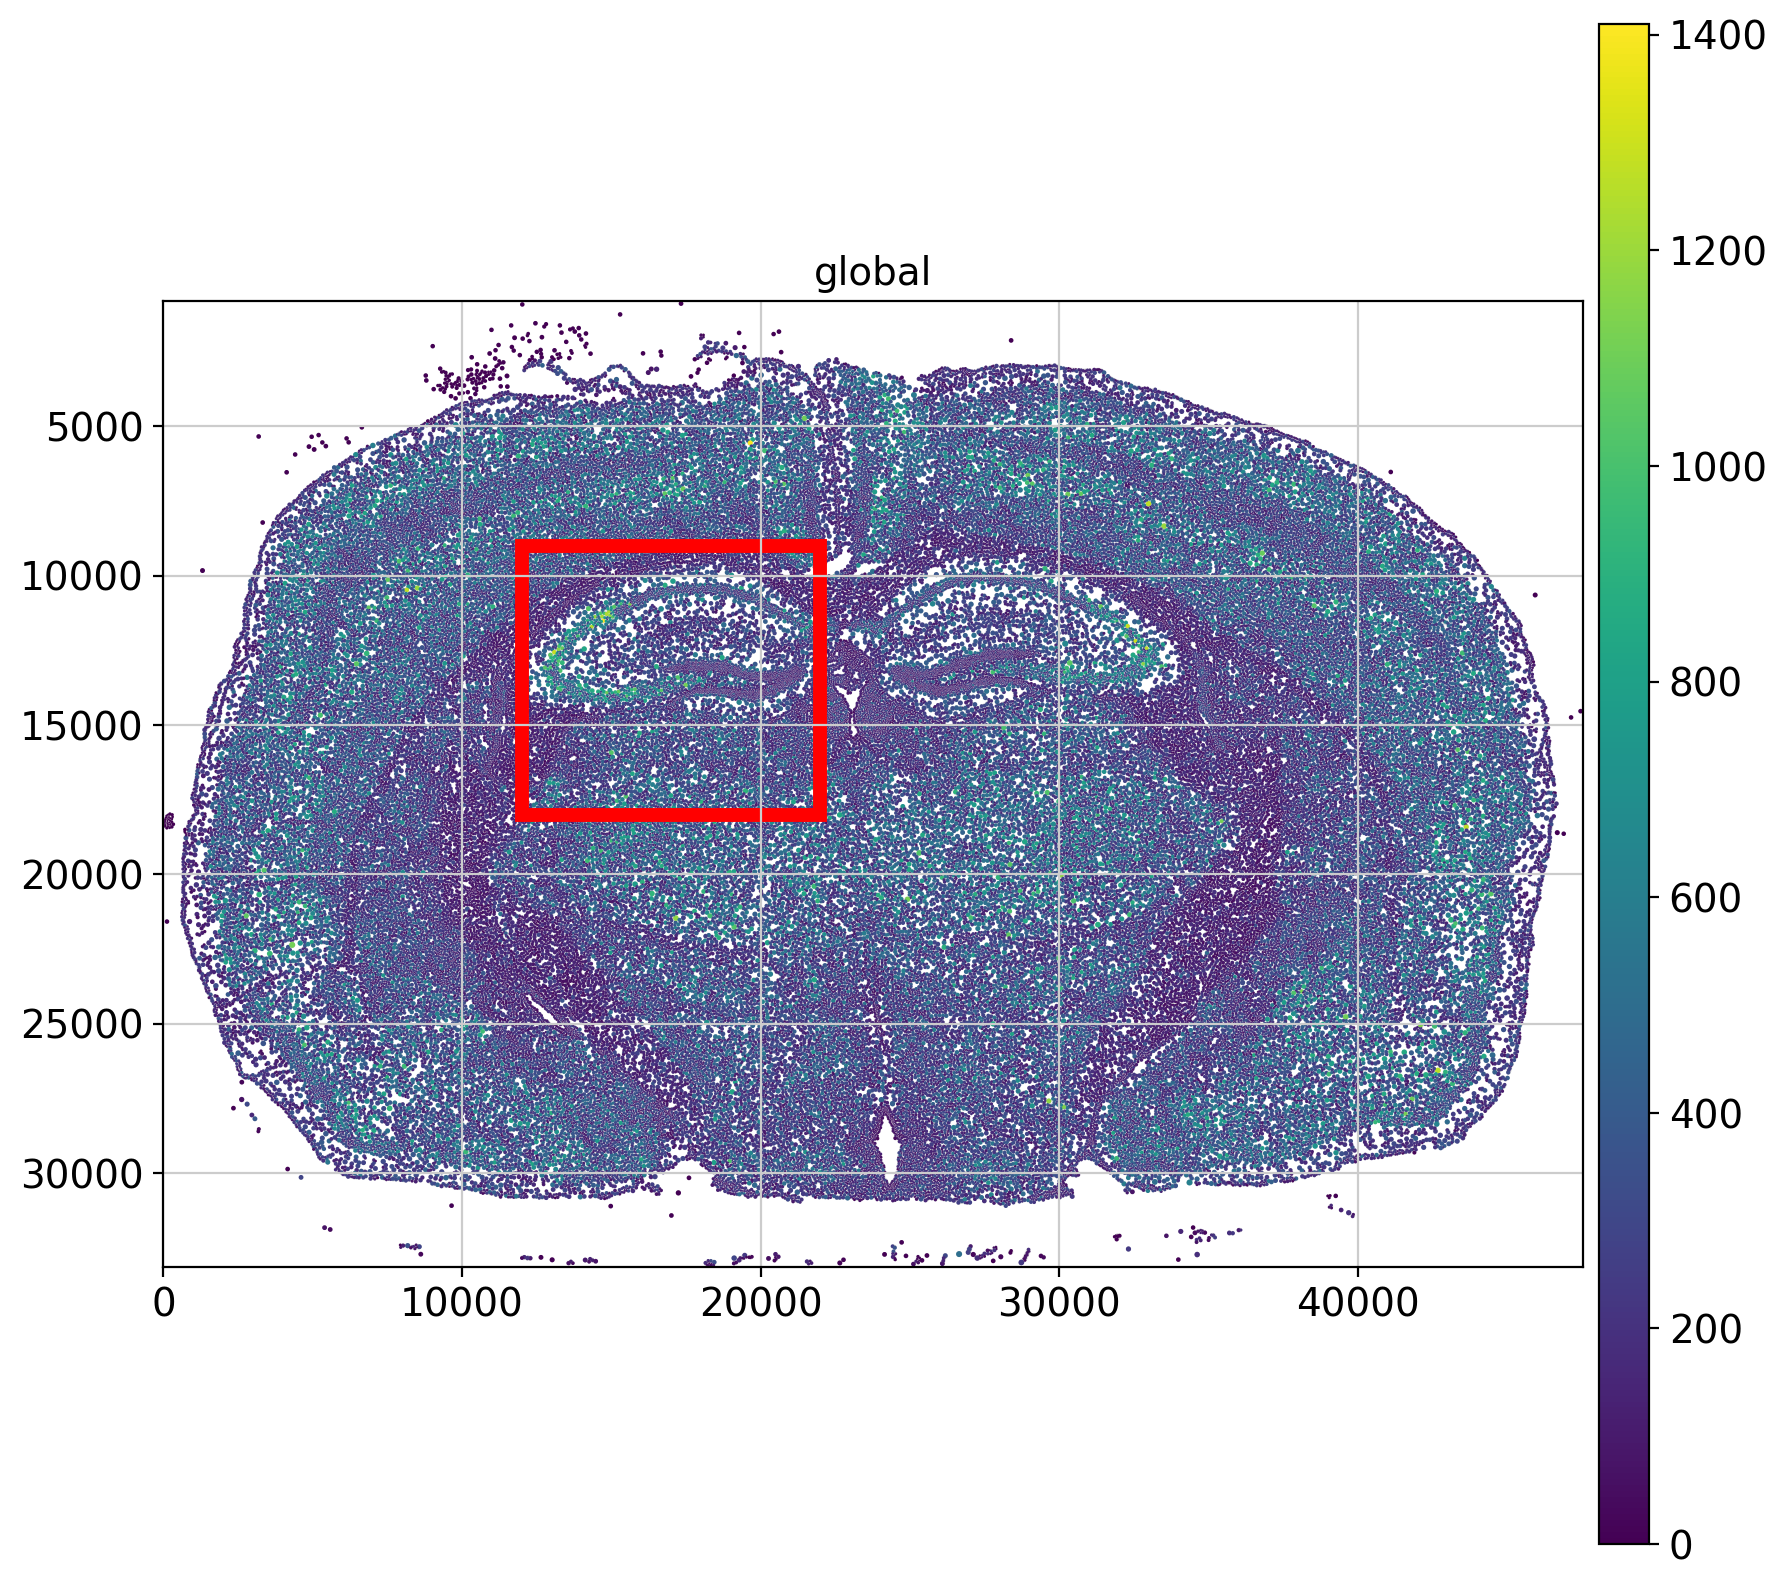

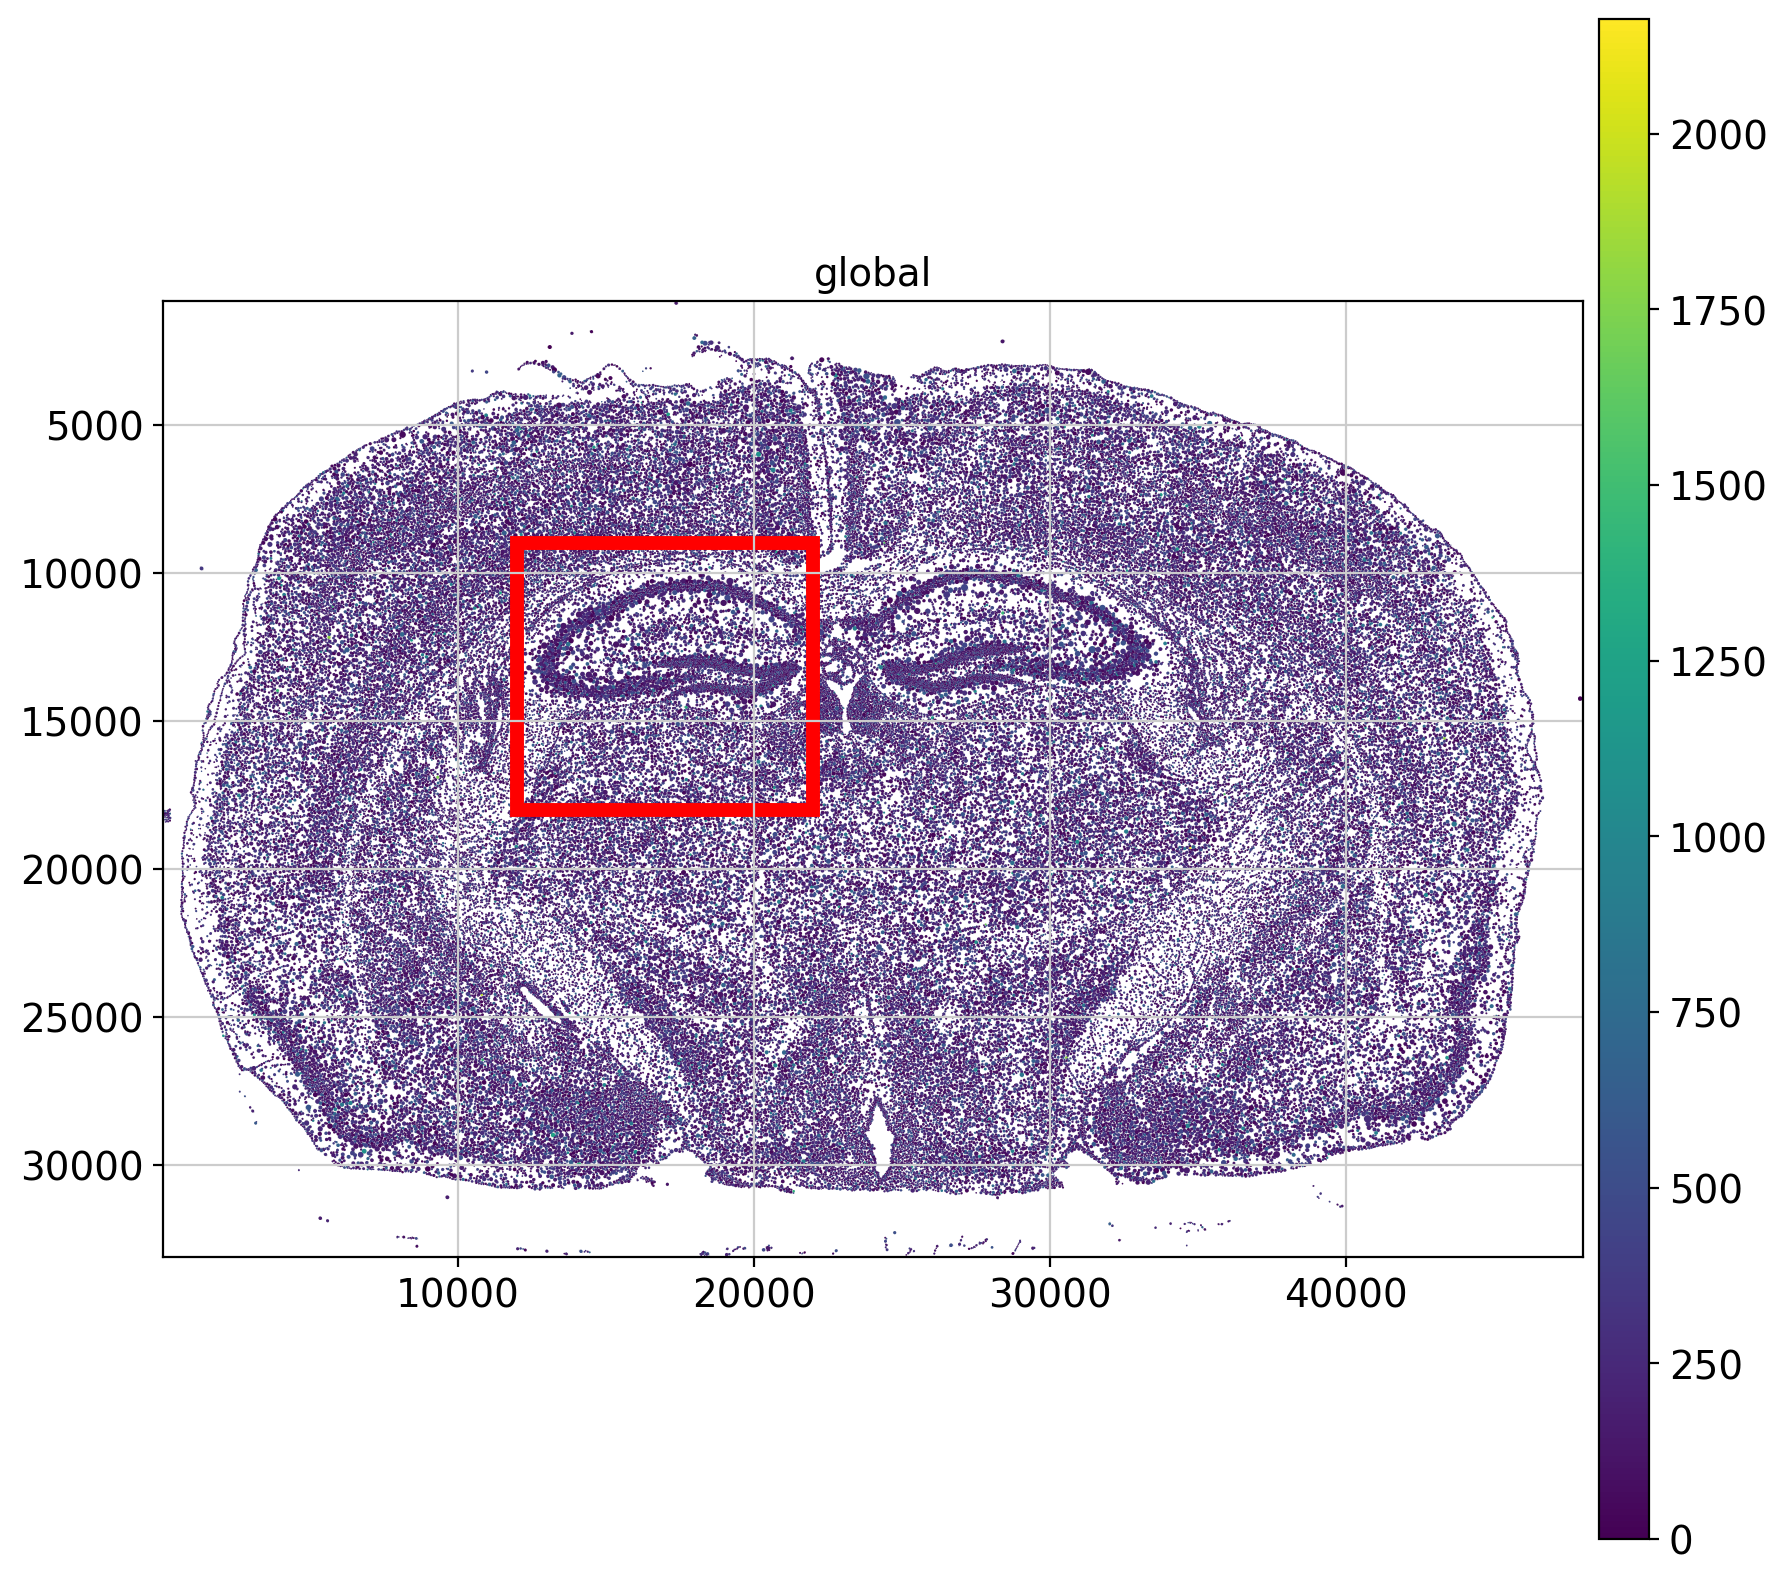

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

bb_xmin = 12000
bb_ymin = 9000
bb_w = 10000
bb_h = 9000

f, ax = plt.subplots()
xenium_brain.pl.render_shapes(color='total_counts', outline=True, outline_width=0.1, method='matplotlib').pl.show(ax=ax)
rect = patches.Rectangle((bb_xmin, bb_ymin), bb_w, bb_h, linewidth=5, edgecolor="red", facecolor="none")
ax.add_patch(rect)

f, ax = plt.subplots()
xenium_brain_proseg.pl.render_shapes(color='total_counts', outline=True, outline_width=0.1, method='matplotlib').pl.show(ax=ax)
rect = patches.Rectangle((bb_xmin, bb_ymin), bb_w, bb_h, linewidth=5, edgecolor="red", facecolor="none")
ax.add_patch(rect)

In [ ]:
xenium_brain.table.obs['false_proportion'] = 0.
xenium_brain.table.obs.loc[adata.obs_names, 'false_proportion'] = 1 - adata.obs['true_proportion_transfer'].values

xenium_brain_proseg.table.obs['false_proportion'] = 0.
xenium_brain_proseg.table.obs.loc[bdata.obs_names, 'false_proportion'] = 1 - bdata.obs['true_proportion_transfer'].values

In [ ]:
xenium_brain.table.obs['diffusion_proportion'] = 0.
xenium_brain.table.obs.loc[adata.obs_names, 'diffusion_proportion'] = adata.obs['diffusion_proportion_transfer'].values

xenium_brain_proseg.table.obs['diffusion_proportion'] = 0.
xenium_brain_proseg.table.obs.loc[bdata.obs_names, 'diffusion_proportion'] = bdata.obs['diffusion_proportion_transfer'].values

In [ ]:
xenium_brain.table.obs['background_proportion'] = 0.
xenium_brain.table.obs.loc[adata.obs_names, 'background_proportion'] = adata.obs['background_proportion_transfer'].values

xenium_brain_proseg.table.obs['background_proportion'] = 0.
xenium_brain_proseg.table.obs.loc[bdata.obs_names, 'background_proportion'] = bdata.obs['background_proportion_transfer'].values

In [ ]:
xenium_brain.table.obs['background_proportion_threshold'] = [0.1 if x > 0.1 else x for x in xenium_brain.table.obs['background_proportion']]
xenium_brain_proseg.table.obs['background_proportion_threshold'] = [0.1 if x > 0.1 else x for x in xenium_brain_proseg.table.obs['background_proportion']]

In [ ]:
f, ax = plt.subplots()
xenium_brain.pl.render_shapes(color='diffusion_proportion', outline=True, outline_width=0.1, method='matplotlib').pl.show(ax=ax)
rect = patches.Rectangle((bb_xmin, bb_ymin), bb_w, bb_h, linewidth=5, edgecolor="red", facecolor="none")
ax.add_patch(rect)
f.savefig('figure3/diffusion_subset.pdf')

In [ ]:
f, ax = plt.subplots()
xenium_brain.pl.render_shapes(color='background_proportion_threshold', outline=True, outline_width=0.1, method='matplotlib').pl.show(ax=ax)
rect = patches.Rectangle((bb_xmin, bb_ymin), bb_w, bb_h, linewidth=5, edgecolor="red", facecolor="none")
ax.add_patch(rect)
f.savefig('figure3/background_subset.pdf')

In [ ]:
f, ax = plt.subplots()
xenium_brain_proseg.pl.render_shapes(color='diffusion_proportion', outline=True, outline_width=0.1, method='matplotlib').pl.show(ax=ax)
rect = patches.Rectangle((bb_xmin, bb_ymin), bb_w, bb_h, linewidth=5, edgecolor="red", facecolor="none")
ax.add_patch(rect)
f.savefig('figure3/diffusion_subset_proseg.pdf')

In [ ]:
f, ax = plt.subplots()
xenium_brain_proseg.pl.render_shapes(color='background_proportion_threshold', outline=True, outline_width=0.1, method='matplotlib').pl.show(ax=ax)
rect = patches.Rectangle((bb_xmin, bb_ymin), bb_w, bb_h, linewidth=5, edgecolor="red", facecolor="none")
ax.add_patch(rect)
f.savefig('figure3/background_subset_proseg.pdf')

In [ ]:
import json
with open('figure2/celltype_markers_sc_ref.json') as f:
    marker_dict = json.load(f)
    print(marker_dict)

In [ ]:
inverted_dict = {gene: cell_type for cell_type, genes in marker_dict.items() for gene in genes}

In [ ]:
inverted_dict['Gjc3'] = 'Oligos'
inverted_dict

In [ ]:
xenium_brain.points['transcripts']['celltype'] = xenium_brain.points['transcripts']['feature_name'].map(lambda x: inverted_dict.get(x, 'unassigned')).astype('category').cat.as_known()
xenium_brain_proseg.points['transcripts']['celltype'] = xenium_brain_proseg.points['transcripts']['feature_name'].map(lambda x: inverted_dict.get(x, 'unassigned')).astype('category').cat.as_known()
xenium_brain.points['transcripts']['celltype'].value_counts().compute()

In [ ]:
adata.obs.index = [int(i) for i in adata.obs.index]
xenium_brain.table.obs['cluster'] = adata.obs['cluster']

In [ ]:
xenium_hippocampus = xenium_brain.query.bounding_box(axes=['x', 'y'], min_coordinate=[12000,9000], max_coordinate=[22000, 18000], target_coordinate_system='global', filter_table=True)

In [ ]:
xenium_hippocampus_proseg = xenium_brain_proseg.query.bounding_box(axes=['x', 'y'], min_coordinate=[12000,9000], max_coordinate=[22000, 18000], target_coordinate_system='global', filter_table=True)

In [ ]:
xenium_hippocampus.pl.render_images(elements='morphology_focus',  size=0.001).pl.show(coordinate_systems=["global"])

In [ ]:
xenium_hippocampus.pl.render_points(
    elements='transcripts', groups=['Astrocytes', 'Vascular', 'Oligos', 'Immune', 'Neurons'], color='celltype', size=0.003, method='matplotlib').pl.show(coordinate_systems=["global"])


In [ ]:
xenium_hippocampus_proseg.pl.render_points(
    elements='transcripts', groups=['Astrocytes', 'Vascular', 'Oligos', 'Immune', 'Neurons'], color='celltype', size=0.003, method='matplotlib').pl.show(coordinate_systems=["global"])


In [ ]:
pd.options.display.max_rows=100

In [ ]:
xenium_hippocampus.table.obs['cluster'].value_counts()

In [ ]:
xenium_hippocampus.shapes['cell_boundaries'] = xenium_hippocampus.shapes['cell_boundaries'].loc[xenium_hippocampus.shapes['cell_circles'].index]
xenium_hippocampus.table.obs['region'] = 'cell_boundaries'

In [ ]:
xenium_hippocampus_proseg.shapes['cell_boundaries'] = xenium_hippocampus_proseg.shapes['cell_boundaries'].loc[xenium_hippocampus_proseg.shapes['cell_circles'].index]
xenium_hippocampus_proseg.table.obs['region'] = 'cell_boundaries'

In [ ]:
xenium_cell = xenium_hippocampus.query.bounding_box(axes=['x', 'y'], min_coordinate=[16800, 14200], max_coordinate=[17500, 14900], target_coordinate_system='global', filter_table=True)
molecule_categories = list(set(xenium_cell.points['transcripts']['celltype'].unique().compute()) - {'unassigned'})
xenium_cell.pl.render_shapes(
    color='diffusion_proportion', outline=True, outline_width=3., outline_alpha=0.8, cmap='Greys', element='cell_boundaries'
).pl.render_points(
    elements='transcripts', groups=molecule_categories, color='celltype', size=20.
).pl.show(title='Celltypes')

In [ ]:
xenium_cell = xenium_hippocampus_proseg.query.bounding_box(axes=['x', 'y'], min_coordinate=[16800, 14200], max_coordinate=[17500, 14900],
                                                           target_coordinate_system='global', filter_table=True)
molecule_categories = list(set(xenium_cell.points['transcripts']['celltype'].unique().compute()) - {'unassigned'})
xenium_cell.pl.render_shapes(
    color='diffusion_proportion', outline=True, outline_width=3., outline_alpha=0.8, cmap='Greys', element='cell_boundaries'
).pl.render_points(
    elements='transcripts', groups=molecule_categories, color='celltype', size=20.
).pl.show(title='Celltypes')

In [ ]:
df = xenium_cell.points['transcripts'].compute()

In [ ]:
from matplotlib.colors import Normalize, ListedColormap

# Normalize z values for consistent coloring across groups
norm = Normalize(vmin=df['z'].min(), vmax=df['z'].max())

# Define colormaps
neuron_cmap = ListedColormap(plt.cm.Blues(np.linspace(0.5, 1, 256)))
immune_cmap = ListedColormap(plt.cm.Reds(np.linspace(0.5, 1, 256)))

f, ax = plt.subplots(1, 3)
f.set_size_inches(26, 8)
for (celltype, group) in df.groupby('celltype'):
    if celltype == 'Neurons':
        axs = ax[1]
    elif celltype == 'Immune':
        axs = ax[0]
    elif celltype == 'Vascular':
        axs = ax[2]
    else:
        continue
    
    b = axs.scatter(group['x'], group['y'], c=group['z'], cmap='viridis', vmin=17, vmax=20)

    # Adding a colorbar
    plt.colorbar(b, label='Z Value')

    # Setting the plot labels and title
    axs.set_xlabel('X Coordinate')
    axs.set_ylabel('Y Coordinate')
    axs.set_ylim(14700, 14800)
    axs.set_xlim(17300, 17400)
    axs.set_title(celltype)

In [ ]:
palette = ['tab:brown', 'tab:red', 'tab:green', 'tab:blue', 'tab:orange']

In [ ]:
subset_df = df[(df['y'] >= 14780) & (df['y'] <= 14810) &
               (df['x'] >= 16850) & (df['x'] <= 16930)]
f, ax = plt.subplots(1, 3)
f.set_size_inches(26, 8)
for (celltype, group) in subset_df.groupby('celltype'):
    if celltype == 'Neurons':
        c = 'red'
        s = 30.
    elif celltype == 'Astrocyte':
        c = 'green'
        s = 30.
    elif celltype == 'Vascular':
        c = 'blue'
        s = 30.
    else:
        continue
    
    axs = ax[0]
    b = axs.scatter(group['x'], group['y'], c=c, s=s, cmap='viridis', vmin=15, vmax=20, label=celltype)
    # Setting the plot labels and title
    axs.set_xlabel('X Coordinate')
    axs.set_ylabel('Y Coordinate')
    axs.set_ylim(subset_df['y'].min(), subset_df['y'].max())
    axs.set_xlim(subset_df['x'].min(), subset_df['x'].max())
    axs = ax[1]
    b = axs.scatter(group['z'], group['y'], c=c, s=s, cmap='viridis', vmin=15, vmax=20, label=celltype)
    # Setting the plot labels and title
    axs.set_xlabel('Z Coordinate')
    axs.set_ylabel('Y Coordinate')
    axs.set_ylim(subset_df['y'].min(), subset_df['y'].max())
    axs.set_xlim(subset_df['z'].min(), subset_df['z'].max())
    axs = ax[2]
    b = axs.scatter(group['x'], group['z'], c=c, s=s, cmap='viridis', vmin=15, vmax=20, label=celltype)
    # Setting the plot labels and title
    axs.set_xlabel('X Coordinate')
    axs.set_ylabel('Z Coordinate')
    axs.set_ylim(subset_df['z'].min(), subset_df['z'].max())
    axs.set_xlim(subset_df['x'].min(), subset_df['x'].max())
    axs.set_title(celltype)
ax[1].legend()
plt.savefig('figure2/z_segmentation_vascular_neuron.pdf')
plt.show()

In [ ]:
indices = xenium_hippocampus.table.obs.loc[xenium_hippocampus.table.obs['cluster']=='Microglia', 'false_proportion'].nlargest(20).index
positions = pd.DataFrame(xenium_hippocampus.table[indices].obsm['spatial'] / 0.2125, index=indices)
for idx in indices:
    print(idx)
    f, ax = plt.subplots(1, 3)
    f.set_size_inches(24, 8)
    try:
        x, y = positions.loc[idx].values
        xenium_cell = xenium_hippocampus.query.bounding_box(axes=['x', 'y'], min_coordinate=[x-200,y-200], max_coordinate=[x+200, y+200], target_coordinate_system='global', filter_table=True)
        molecule_categories = list(set(xenium_cell.points['transcripts']['celltype'].unique().compute()) - {'unassigned'})
        xenium_cell.pl.render_shapes(
            color='false_proportion', outline=True, outline_width=3., outline_alpha=0.8, cmap='Greys', element='cell_boundaries'
        ).pl.render_points(
            elements='transcripts', groups=molecule_categories, color='celltype', size=20.
        ).pl.show(ax=ax[0], title='Celltypes')
        ax[0].set_xlim(x-200, x+200)
        ax[0].set_ylim(y-200, y+200)
        ax[0].legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
        xenium_cell.pl.render_shapes(
            color='false_proportion', outline=True, outline_width=3., outline_alpha=0.8, cmap='Greys', element='cell_boundaries'
        ).pl.render_points(
            elements='transcripts', groups=['Slc17a6', 'Gad1', 'Gjc3', 'Trem2', 'Slc17a7'], color='feature_name', size=20., palette=palette,
        ).pl.show(ax=ax[1], title='Single Molecules')
        ax[1].set_xlim(x-200, x+200)
        ax[1].set_ylim(y-200, y+200)
        ax[1].legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
        xenium_cell.pl.render_images(
            elements='morphology_focus', size=0.001
        ).pl.render_shapes(
            outline=True, outline_width=2., outline_alpha=0.8, cmap='Greys', element='cell_boundaries', fill_alpha=0.01
        ).pl.show(ax=ax[2], title='Nuclei')
        ax[2].set_xlim(x-200, x+200)
        ax[2].set_ylim(y-200, y+200)
        plt.tight_layout(pad=3.0)
        plt.savefig(f'figure2/microglia_molecule_display{idx}.pdf')
        plt.show()
    except ValueError:
        pass

In [ ]:
for idx in indices:
    print(idx)
    f, ax = plt.subplots(1, 3)
    f.set_size_inches(24, 8)
    try:
        x, y = positions.loc[idx].values
        xenium_cell = xenium_hippocampus_proseg.query.bounding_box(axes=['x', 'y'], min_coordinate=[x-200,y-200], max_coordinate=[x+200, y+200], target_coordinate_system='global', filter_table=True)
        molecule_categories = list(set(xenium_cell.points['transcripts']['celltype'].unique().compute()) - {'unassigned'})
        xenium_cell.pl.render_shapes(
            color='false_proportion', outline=True, outline_width=3., outline_alpha=0.8, cmap='Greys', element='cell_boundaries'
        ).pl.render_points(
            elements='transcripts', groups=molecule_categories, color='celltype', size=20.
        ).pl.show(ax=ax[0], title='Celltypes')
        ax[0].set_xlim(x-200, x+200)
        ax[0].set_ylim(y-200, y+200)
        ax[0].legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
        xenium_cell.pl.render_shapes(
            color='false_proportion', outline=True, outline_width=3., outline_alpha=0.8, cmap='Greys', element='cell_boundaries'
        ).pl.render_points(
            elements='transcripts', groups=['Slc17a6', 'Gad1', 'Gjc3', 'Trem2', 'Slc17a7'], color='feature_name', size=20., palette=palette,
        ).pl.show(ax=ax[1], title='Single Molecules')
        ax[1].set_xlim(x-200, x+200)
        ax[1].set_ylim(y-200, y+200)
        ax[1].legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
        xenium_cell.pl.render_images(
            elements='morphology_focus', size=0.001
        ).pl.render_shapes(
            outline=True, outline_width=2., outline_alpha=0.8, cmap='Greys', element='cell_boundaries', fill_alpha=0.01
        ).pl.show(ax=ax[2], title='Nuclei')
        ax[2].set_xlim(x-200, x+200)
        ax[2].set_ylim(y-200, y+200)
        plt.tight_layout(pad=3.0)
        plt.savefig(f'figure2/proseg_microglia_molecule_display{idx}.pdf')
        plt.show()
    except ValueError:
        pass

In [ ]:
f, ax = plt.subplots(1, 3)
f.set_size_inches(24, 8)
x, y = 18090, 15350
xenium_cell = xenium_hippocampus.query.bounding_box(axes=['x', 'y'], min_coordinate=[x-200,y-200], max_coordinate=[x+200, y+200], target_coordinate_system='global', filter_table=True)
molecule_categories = list(set(xenium_cell.points['transcripts']['celltype'].unique().compute()) - {'unassigned'})
xenium_cell.pl.render_shapes(
    color='false_proportion', outline=True, outline_width=3., outline_alpha=0.8, cmap='Greys', element='cell_boundaries'
).pl.render_points(
    elements='transcripts', groups=molecule_categories, color='celltype', size=20.
).pl.show(ax=ax[0], title='Celltypes')
ax[0].set_xlim(x-200, x+200)
ax[0].set_ylim(y-200, y+200)
ax[0].legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
xenium_cell.pl.render_shapes(
    color='false_proportion', outline=True, outline_width=3., outline_alpha=0.8, cmap='Greys', element='cell_boundaries'
).pl.render_points(
    elements='transcripts', groups=['Slc17a6', 'Gad1', 'Gjc3', 'Trem2', 'Slc17a7'], color='feature_name', size=20., palette=palette,
).pl.show(ax=ax[1], title='Single Molecules')
ax[1].set_xlim(x-200, x+200)
ax[1].set_ylim(y-200, y+200)
ax[1].legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
xenium_cell.pl.render_images(
    elements='morphology_focus', size=0.001
).pl.show(ax=ax[2], title='Nuclei')
ax[2].set_xlim(x-200, x+200)
ax[2].set_ylim(y-200, y+200)
plt.tight_layout(pad=3.0)
plt.savefig(f'figure2/original_microglia_molecule_display_final.pdf')
plt.show()

In [ ]:
f, ax = plt.subplots(1, 3)
f.set_size_inches(24, 8)
x, y = 18090, 15350
xenium_cell = xenium_hippocampus_proseg.query.bounding_box(axes=['x', 'y'], min_coordinate=[x-200,y-200], max_coordinate=[x+200, y+200], target_coordinate_system='global', filter_table=True)
molecule_categories = list(set(xenium_cell.points['transcripts']['celltype'].unique().compute()) - {'unassigned'})
xenium_cell.pl.render_shapes(
    color='false_proportion', outline=True, outline_width=3., outline_alpha=0.8, cmap='Greys', element='cell_boundaries'
).pl.render_points(
    elements='transcripts', groups=molecule_categories, color='celltype', size=20.
).pl.show(ax=ax[0], title='Celltypes')
ax[0].set_xlim(x-200, x+200)
ax[0].set_ylim(y-200, y+200)
ax[0].legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
xenium_cell.pl.render_shapes(
    color='false_proportion', outline=True, outline_width=3., outline_alpha=0.8, cmap='Greys', element='cell_boundaries'
).pl.render_points(
    elements='transcripts', groups=['Slc17a6', 'Gad1', 'Gjc3', 'Trem2', 'Slc17a7'], color='feature_name', size=20., palette=palette,
).pl.show(ax=ax[1], title='Single Molecules')
ax[1].set_xlim(x-200, x+200)
ax[1].set_ylim(y-200, y+200)
ax[1].legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
xenium_cell.pl.render_images(
    elements='morphology_focus', size=0.001
).pl.show(ax=ax[2], title='Nuclei')
ax[2].set_xlim(x-200, x+200)
ax[2].set_ylim(y-200, y+200)
plt.tight_layout(pad=3.0)
plt.savefig(f'figure2/proseg_microglia_molecule_display_final.pdf')
plt.show()